In [2]:
import csv
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
arra = []
with open('16-09-27.csv') as file:
    reader = csv.reader(file, delimiter='\t')
    a = 0
    for row in reader:
        if(a==0):
            a+=1
            continue
#         if(a==10):
#             break
        arr = np.array(row)
        if(arr[7]==""):
            arr[7]=arr[9]
        if(arr[8]==""):
            arr[8]=arr[10]
        arr = np.delete(arr,(5,9,10))
        
        
        arra.append(arr)
#         a += 1
#     print(arr)
#     print(ar)
file.close()
 
# arra = np.array(ar)
columns = ['frameNumber','timeRelative','frame.len','protocolNumber','protocolName','ipDst','srcPort','dstPort','ipDSCP','ethsrc','ethdst']

df = pd.DataFrame(data=arra,columns=columns)
# print(df)
# df.head(5)
features = ['frameNumber','timeRelative','frame.len','protocolNumber','protocolName','ipDst','srcPort','dstPort','ipDSCP']

# print(arra)
X = df[features]
# print(X)
# X.head()
y1 = df['ethsrc']
# print(y1)
# y1.head()
# y2 = df['ethdst']
# print(y2)

# X, y1 = shuffle(X, y1, random_state=0)
# print(X, y1)
# print("here")
df

,frameNumber,timeRelative,frame.len,protocolNumber,protocolName,ipDst,srcPort,dstPort,ipDSCP,ethsrc,ethdst
0,1,0.000000000,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767,443,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
1,2,0.220575000,66,6,eth:ethertype:ip:tcp,192.168.1.106,443,40767,0,14:cc:20:51:33:ea,30:8c:fb:2f:e4:b2
2,3,0.537609000,284,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767,443,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
3,4,2.075699000,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767,443,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
4,5,2.186605000,90,17,eth:ethertype:ip:udp:ntp,192.168.1.196,123,4967,6,14:cc:20:51:33:ea,d0:52:a8:00:67:5e
...,...,...,...,...,...,...,...,...,...,...,...
527030,527031,86398.649904000,42,,eth:ethertype:arp,,,,,f4:f2:6d:93:51:f1,14:cc:20:51:33:ea
527031,527032,86398.698987000,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767,443,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
527032,527033,86398.904135000,66,6,eth:ethertype:ip:tcp,192.168.1.106,443,40767,0,14:cc:20:51:33:ea,30:8c:fb:2f:e4:b2
527033,527034,86399.490511000,118,1,eth:ethertype:ip:icmp:data,192.168.1.1,,,0,ec:1a:59:79:f4:89,14:cc:20:51:33:ea


In [3]:
catCols = ['frameNumber','timeRelative','frame.len','protocolNumber','srcPort','dstPort','ipDSCP']
for col in catCols:
    X[col] = pd.to_numeric(X[col],errors='coerce')
# X['frameNumber'] = pd.to_numeric(X['frameNumber'])
# X.astype({'frameNumber':'int32','timeRelative':'float64','frame.len':'int32','protocolNumber':'int32'}).dtypes
# intCols intCols= X.columns[X.dtypes=='int32']

# X.astype({'srcPort':'int32'}).dtypes

textCols = ['protocolName', 'ipDst']

for col in textCols:
    X.loc[X[col]=='',[col]] = "missing"

X.dtypes

<ipython-input-3-2ef742cc0928>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.to_numeric(X[col],errors='coerce')
/home/deepak/.local/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


frameNumber         int64
timeRelative      float64
frame.len           int64
protocolNumber    float64
protocolName       object
ipDst              object
srcPort           float64
dstPort           float64
ipDSCP            float64
dtype: object

In [4]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=-1)
imp.fit(X)
# n = imp.transform(X[textCols])
# a = 0
# for i in n:
#     print(i)
#     a+=1
#     if(a==50):
#         break



Xt = imp.transform(X)
X = pd.DataFrame(data=Xt,columns=features)



X.head(33)

,frameNumber,timeRelative,frame.len,protocolNumber,protocolName,ipDst,srcPort,dstPort,ipDSCP
0,1,0,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767,443,0
1,2,0.220575,66,6,eth:ethertype:ip:tcp,192.168.1.106,443,40767,0
2,3,0.537609,284,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767,443,0
3,4,2.0757,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767,443,0
4,5,2.18661,90,17,eth:ethertype:ip:udp:ntp,192.168.1.196,123,4967,6
5,6,2.2979,66,6,eth:ethertype:ip:tcp,192.168.1.106,443,40767,0
6,7,3.10816,156,6,eth:ethertype:ip:tcp:tls,52.87.241.159,40767,443,0
7,8,3.24103,268,17,eth:ethertype:ip:udp:dns,192.168.1.241,53,35876,0
8,9,3.24699,98,1,eth:ethertype:ip:icmp:data,62.210.177.216,-1,-1,0
9,10,3.32833,66,6,eth:ethertype:ip:tcp,192.168.1.106,443,40767,0


In [5]:
enc = OrdinalEncoder(dtype=np.float64)
enc.fit(X)
# enc.categories_
X_enc = enc.transform(X)
X = pd.DataFrame(data=X_enc,columns=features)
X.tail(33)

,frameNumber,timeRelative,frame.len,protocolNumber,protocolName,ipDst,srcPort,dstPort,ipDSCP
527002,527002.0,527002.0,95.0,3.0,31.0,231.0,2855.0,8.0,1.0
527003,527003.0,527003.0,12.0,3.0,8.0,67.0,8.0,2842.0,1.0
527004,527004.0,527004.0,99.0,3.0,31.0,195.0,4924.0,4878.0,1.0
527005,527005.0,527005.0,12.0,3.0,8.0,316.0,4455.0,23.0,1.0
527006,527006.0,527006.0,95.0,3.0,31.0,231.0,2855.0,8.0,1.0
527007,527007.0,527007.0,67.0,3.0,31.0,70.0,4906.0,4896.0,1.0
527008,527008.0,527008.0,5.0,3.0,8.0,195.0,4924.0,4878.0,1.0
527009,527009.0,527009.0,12.0,3.0,8.0,72.0,23.0,4430.0,1.0
527010,527010.0,527010.0,12.0,3.0,8.0,67.0,8.0,2842.0,1.0
527011,527011.0,527011.0,95.0,3.0,31.0,231.0,2855.0,8.0,1.0


In [8]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le1.fit(y1)
label = le1.classes_
y = le1.transform(y1)
y

array([ 7,  4,  7, ...,  4, 15,  4])

In [9]:
# START MODEL HERE!!
##########################################################
#################################
#######################################

from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)  89
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)   90
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)    0.8991643834576765
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier() 
classifier=classifier.fit(X_train,y_train) 
predicted=classifier.predict(X_test)

print('done')

done


In [10]:
classifier.feature_importances_

array([0.06966   , 0.06975388, 0.12561213, 0.01946552, 0.07736177,
       0.25000068, 0.23910338, 0.14089426, 0.00814838])

In [11]:
classifier.predict_proba(X_test)[:-33]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
from sklearn.model_selection import cross_val_score
import numpy as np
cv = cross_val_score(classifier, X_train, y_train, cv=10)
print(cv)
print(np.mean(cv))
# scores
print("CV")

[0.89794812 0.89572548 0.90046892 0.8958339  0.9003307  0.8999241
 0.89547869 0.89745744 0.89810799 0.89919224]
0.8980467581686591
CV


In [13]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

print ('Confusion Matrix :') 
CM = confusion_matrix(y_test, predicted, normalize="pred")
CM_not = confusion_matrix(y_test,predicted)
print(CM) 

Confusion Matrix :
[[9.13086457e-01 2.83326250e-04 0.00000000e+00 6.88705234e-04
  7.81385657e-03 0.00000000e+00 3.99201597e-03 1.89627382e-04
  1.99852740e-03 7.95228628e-03 7.58820686e-02 1.62954916e-03
  1.55649889e-02 0.00000000e+00 2.96875000e-02 2.75119617e-02
  2.71584921e-02 9.05192949e-03]
 [7.60398449e-05 8.92052699e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.98807157e-03 1.10198163e-01 0.00000000e+00
  0.00000000e+00 1.39471903e-01 1.56250000e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.23076923e-01 0.00000000e+00
  2.89402095e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.10371305e-04 0.00000000e+00 0.00000000e+00 2.17273221e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.52079690e-04 1.41663125e-04 0.00000000e+00 8.80853994e-01
  1.93899404e-03 0.00000000e+00 1.53027279e-02 1.89627382e-04
  3.15556958e-

In [14]:
print ('Report : ') 
print (classification_report(y_test, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.91      0.92      0.92     13083
           1       0.89      0.88      0.89      7147
           2       0.92      0.86      0.89        56
           3       0.88      0.87      0.87      1475
           4       0.93      0.92      0.92     69636
           5       0.92      0.83      0.87        29
           6       0.67      0.67      0.67      1501
           7       0.97      0.97      0.97     31530
           8       0.91      0.91      0.91      9467
           9       0.62      0.63      0.62       494
          10       0.47      0.48      0.47      1994
          11       0.93      0.92      0.93      1861
          12       0.68      0.71      0.69      4763
          13       0.84      0.85      0.84      4388
          14       0.67      0.69      0.68      1244
          15       0.56      0.57      0.57      2457
          16       0.77      0.78      0.77      4858
          17     

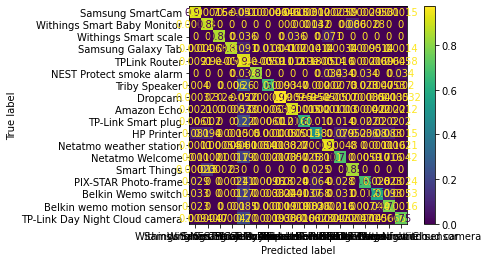

In [15]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.metrics import plot_confusion_matrix

mac_to_device = {'00:16:6c:ab:6b:88':'Samsung SmartCam', '00:24:e4:11:18:a8':'Withings Smart Baby Monitor', '00:24:e4:1b:6f:96':'Withings Smart scale',
                '08:21:ef:3b:fc:e3':'Samsung Galaxy Tab', '14:cc:20:51:33:ea':'TPLink Router', '18:b4:30:25:be:e4':'NEST Protect smoke alarm',
                 '18:b7:9e:02:20:44':'Triby Speaker', '30:8c:fb:2f:e4:b2':'Dropcam','44:65:0d:56:cc:d3':'Amazon Echo', 
                 '50:c7:bf:00:56:39':'TP-Link Smart plug', '70:5a:0f:e4:9b:c0':'HP Printer', '70:ee:50:03:b8:ac':'Netatmo weather station', 
                 '70:ee:50:18:34:43':'Netatmo Welcome',  'd0:52:a8:00:67:5e':'Smart Things', 'e0:76:d0:33:bb:85':'PIX-STAR Photo-frame',
                 'ec:1a:59:79:f4:89':'Belkin Wemo switch', 'ec:1a:59:83:28:11':'Belkin wemo motion sensor', 'f4:f2:6d:93:51:f1':'TP-Link Day Night Cloud camera', 
                    }
devices = [d for d in mac_to_device.values()]

# print(le1.transform(label))
plot_confusion_matrix(classifier, X_test, y_test, normalize='true', display_labels=devices, include_values=True)

Text(141.0, 0.5, 'Truth')

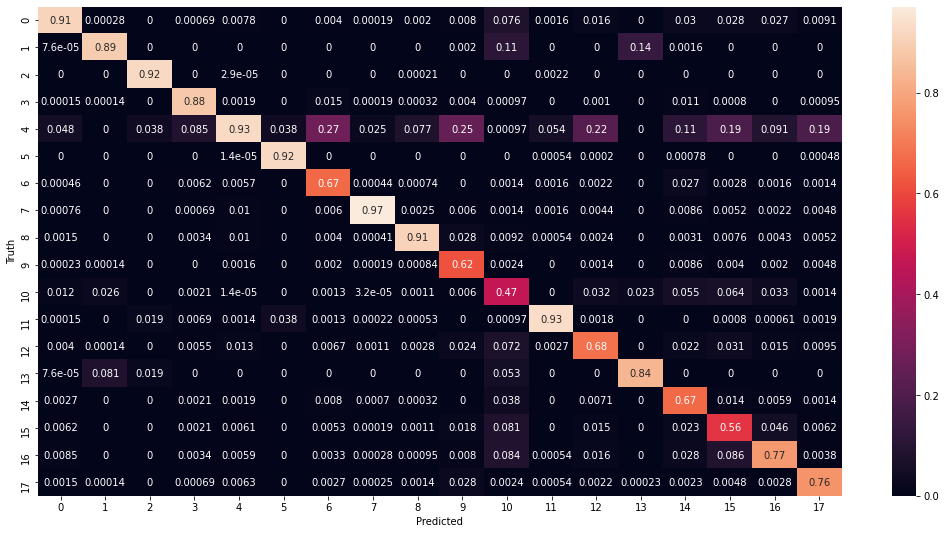

In [16]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(18,9))
sn.heatmap(CM, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [17]:
import pandas as pd# CMd = pd.DataFrame(CM, columns=devices, index=le1.classes_)

CMd = pd.DataFrame(CM_not, columns=devices, index=devices)

CMd.head(18)

,Samsung SmartCam,Withings Smart Baby Monitor,Withings Smart scale,Samsung Galaxy Tab,TPLink Router,NEST Protect smoke alarm,Triby Speaker,Dropcam,Amazon Echo,TP-Link Smart plug,HP Printer,Netatmo weather station,Netatmo Welcome,Smart Things,PIX-STAR Photo-frame,Belkin Wemo switch,Belkin wemo motion sensor,TP-Link Day Night Cloud camera
Samsung SmartCam,12008,2,0,1,540,0,6,6,19,4,157,3,77,0,38,69,134,19
Withings Smart Baby Monitor,1,6297,0,0,0,0,0,0,0,1,228,0,0,618,2,0,0,0
Withings Smart scale,0,0,48,0,2,0,0,0,2,0,0,4,0,0,0,0,0,0
Samsung Galaxy Tab,2,1,0,1279,134,0,23,6,3,2,2,0,5,0,14,2,0,2
TPLink Router,635,0,2,124,64142,1,413,799,734,126,2,100,1084,0,143,479,448,404
NEST Protect smoke alarm,0,0,0,0,1,24,0,0,0,0,0,1,1,0,1,0,0,1
Triby Speaker,6,0,0,9,395,0,1000,14,7,0,3,3,11,0,35,7,8,3
Dropcam,10,0,0,1,701,0,9,30709,24,3,3,3,22,0,11,13,11,10
Amazon Echo,20,0,0,5,689,0,6,13,8633,14,19,1,12,0,4,19,21,11
TP-Link Smart plug,3,1,0,0,109,0,3,6,8,311,5,0,7,0,11,10,10,10
